# Artificial Intelligence Tasks
Email Address: kumazawa@isl.titech.ac.jp

## Task1 Make the program for the Prababilistic Binary model of the neuron.
- y={1 if ran() ≤ P*RAND_MAX
   0 else ran() > PXRANO_MAX 0}
- P=sigma id (s-θ)
- s= N^∑_i=i
- N=4
- x₁=0, x₂=1, x₃=1, x₄=0
- w₁=2, w₂=0.5, w₃=-1, w₄=-2 
- θ=0.5
- Compute y 100,1000,10000 times & Check if y=1 heppens with probabilty
- P = sigma id (s-θ)
- 2(Gain) is important. Please compare the results for different α,α=0.1,1,5,10

----------

## A

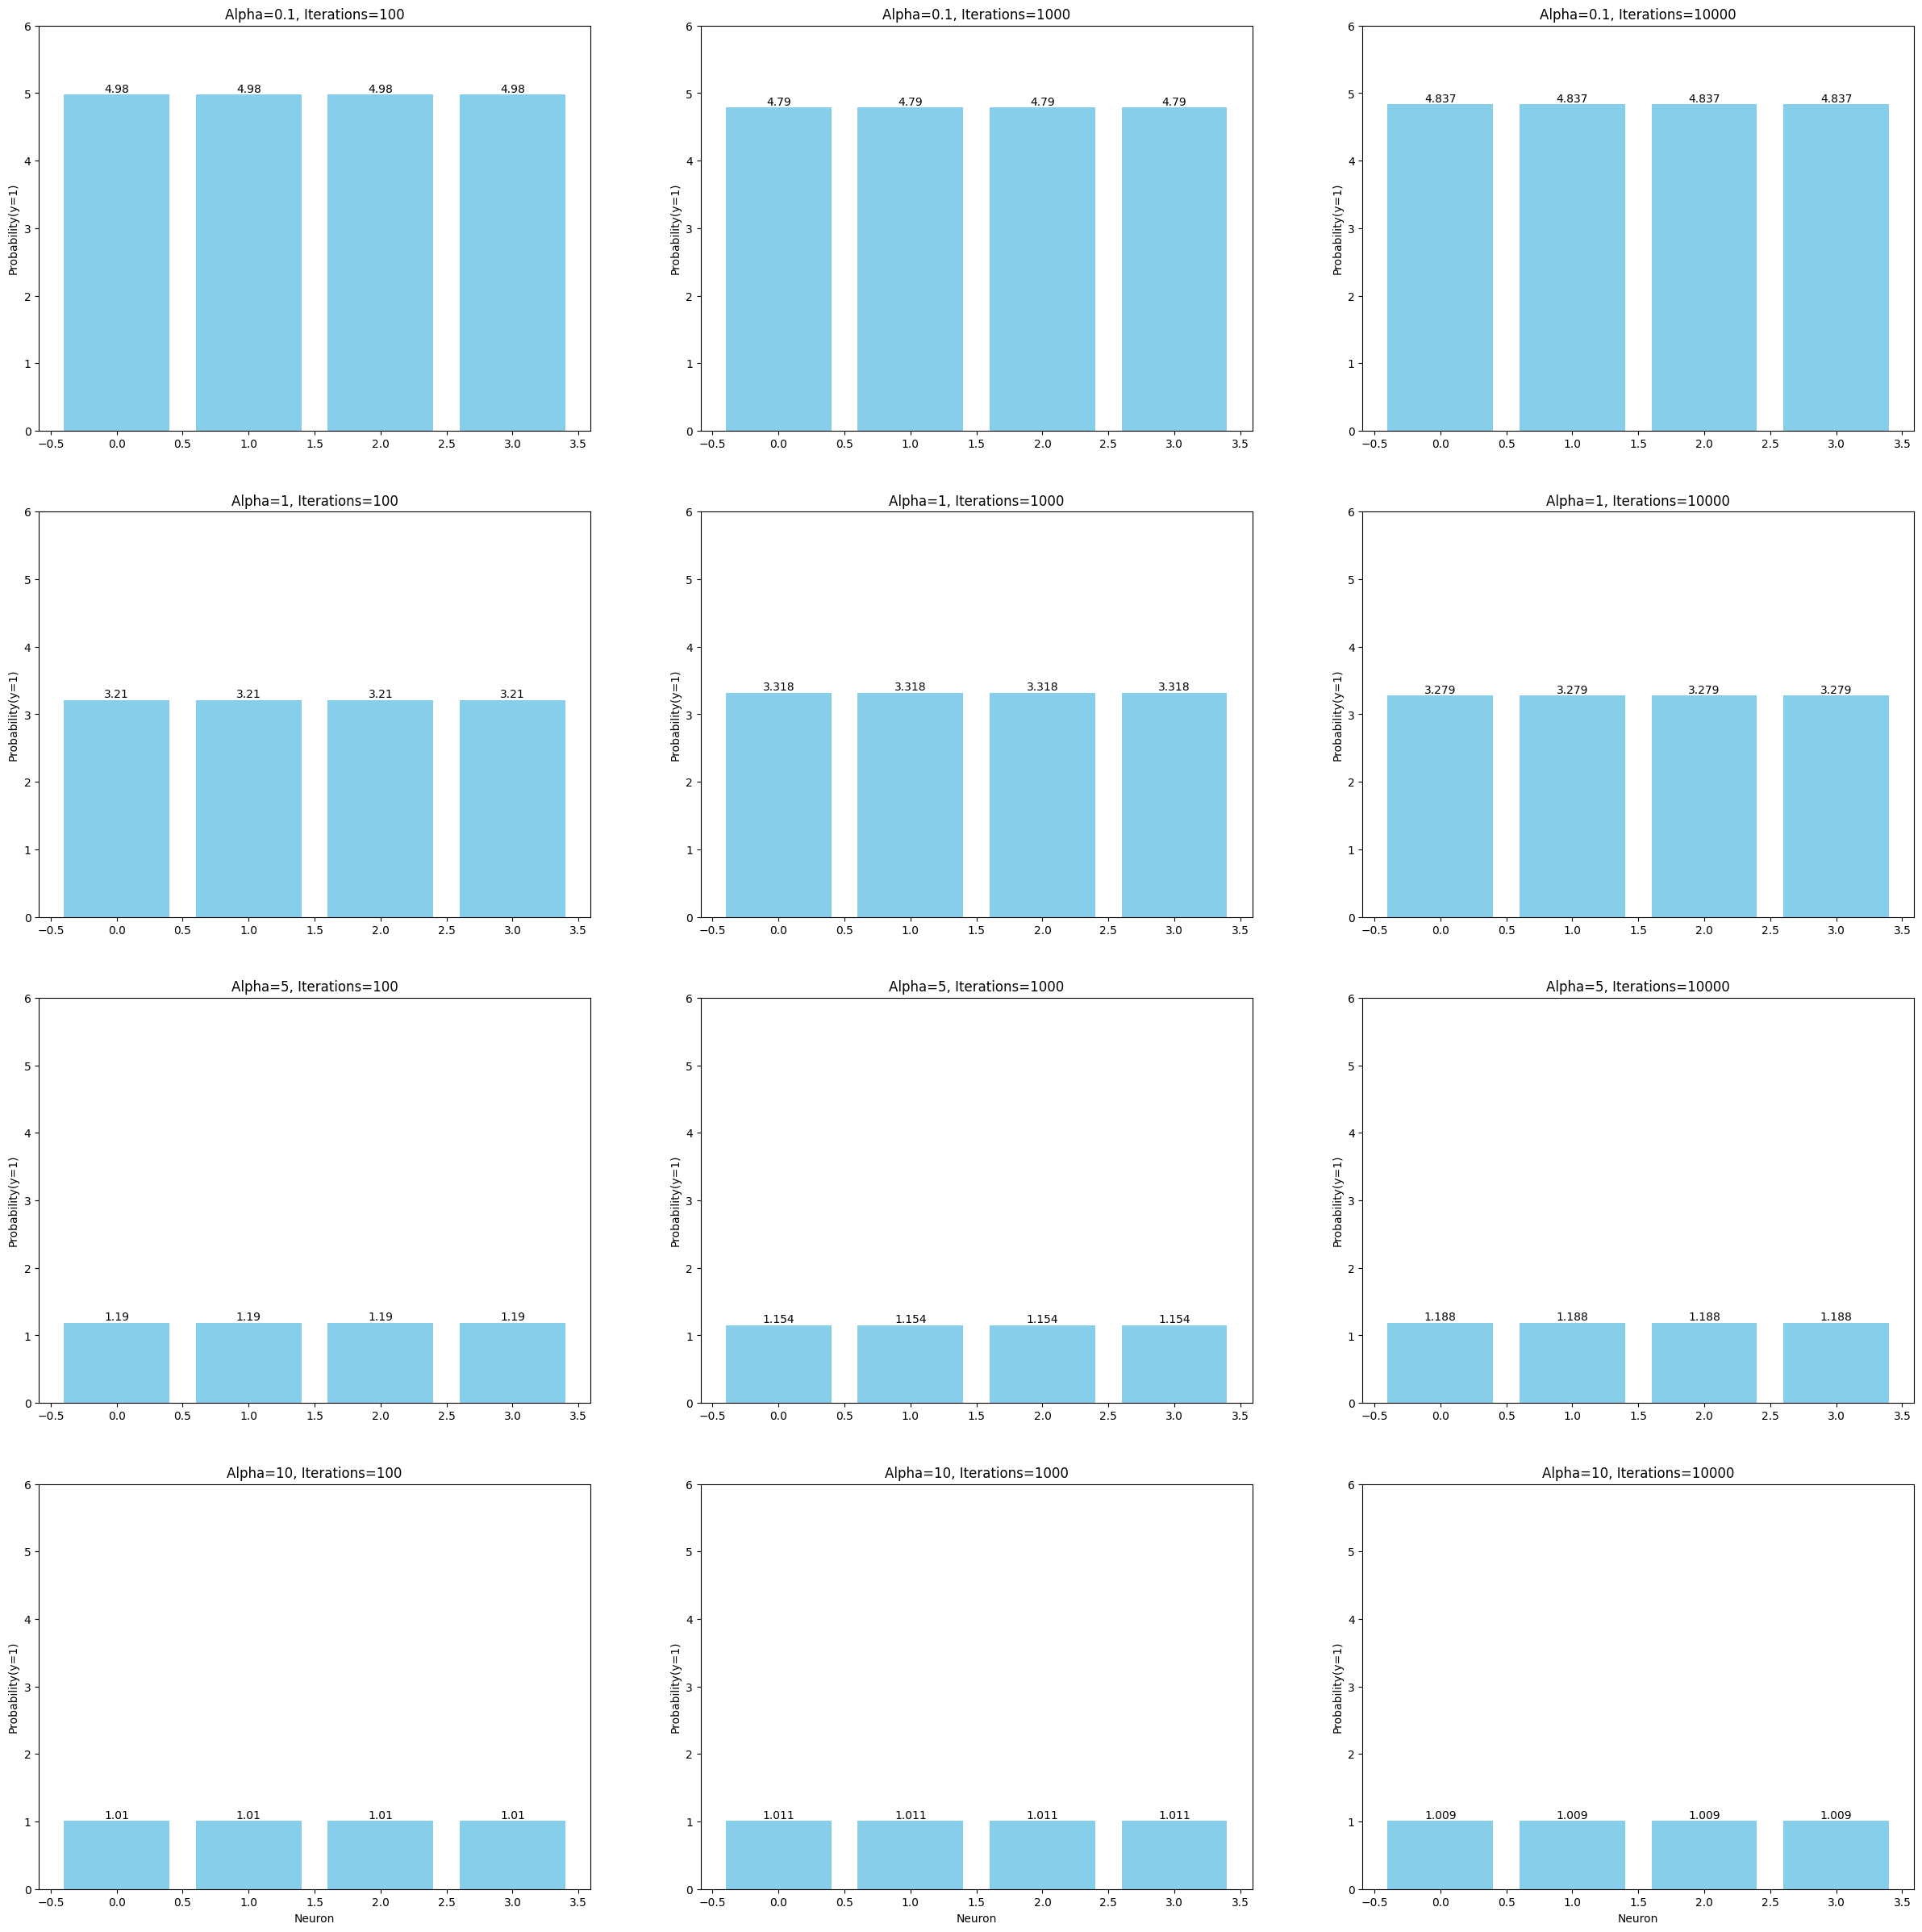

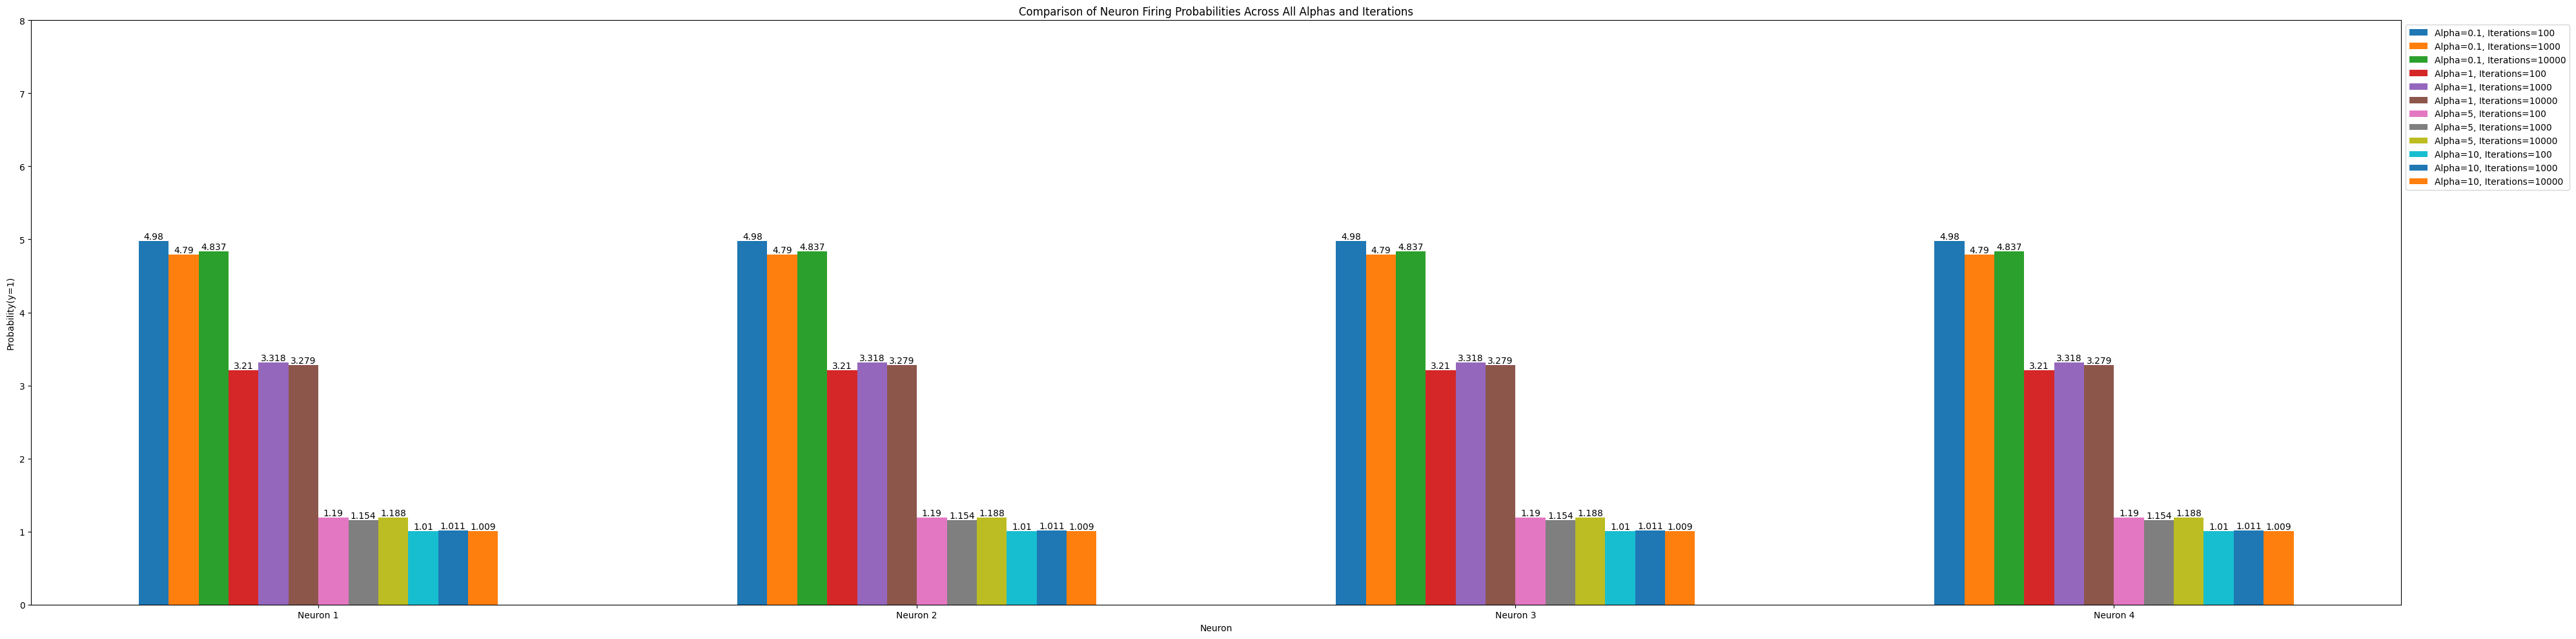

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_y(N, x, w, theta, alpha, num_iterations):
    probabilities = sigmoid(alpha * (np.dot(x, w) - theta))
    y_random = np.random.rand(num_iterations, x.shape[0])
    y = y_random < probabilities[np.newaxis, :]
    y_counts = np.sum(y, axis=1)
    return np.sum(y_counts, axis=0) / num_iterations

N = 4
num_rows = 10
x = np.random.rand(num_rows, N)
w = np.array([2, 0.5, -1, -2])
theta = 0.5
alphas = [0.1, 1, 5, 10]
num_iterations = [100, 1000, 10000]

probabilities_for_alpha = {alpha: {iterations: None for iterations in num_iterations} for alpha in alphas}

for alpha in alphas:
    for iterations in num_iterations:
        probabilities_for_alpha[alpha][iterations] = compute_y(N, x, w, theta, alpha, iterations)

# Function to add text on bars
def add_text_on_bars(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# First set of plots
plt.figure(figsize=(30, 30))
for i, alpha in enumerate(alphas):
    for j, iterations in enumerate(num_iterations):
        ax = plt.subplot(len(alphas), len(num_iterations), i * len(num_iterations) + j + 1)
        bars = plt.bar(range(N), probabilities_for_alpha[alpha][iterations], color='skyblue')
        plt.ylim(0, 6)
        plt.title(f'Alpha={alpha}, Iterations={iterations}')
        plt.ylabel('Probability(y=1)')
        if i == len(alphas) - 1:
            plt.xlabel('Neuron')
        add_text_on_bars(bars)

# Combined plot
plt.figure(figsize=(40, 10))
num_groups = N
bar_width = 0.05
bar_positions = [np.arange(num_groups) - (bar_width * (len(num_iterations) * len(alphas) - 1) / 2) + 
                 (i * len(num_iterations) + j) * bar_width 
                 for i in range(len(alphas)) for j in range(len(num_iterations))]

for alpha_idx, alpha in enumerate(alphas):
    for iter_idx, iterations in enumerate(num_iterations):
        offset_idx = alpha_idx * len(num_iterations) + iter_idx
        bars = plt.bar(bar_positions[offset_idx], probabilities_for_alpha[alpha][iterations], 
                       width=bar_width, label=f'Alpha={alpha}, Iterations={iterations}')
        add_text_on_bars(bars)

plt.xlabel('Neuron')
plt.ylabel('Probability(y=1)')
plt.title('Comparison of Neuron Firing Probabilities Across All Alphas and Iterations')
plt.xticks(np.arange(num_groups), [f'Neuron {i + 1}' for i in range(num_groups)])
plt.ylim(0, 8)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

-------------------

## Notused

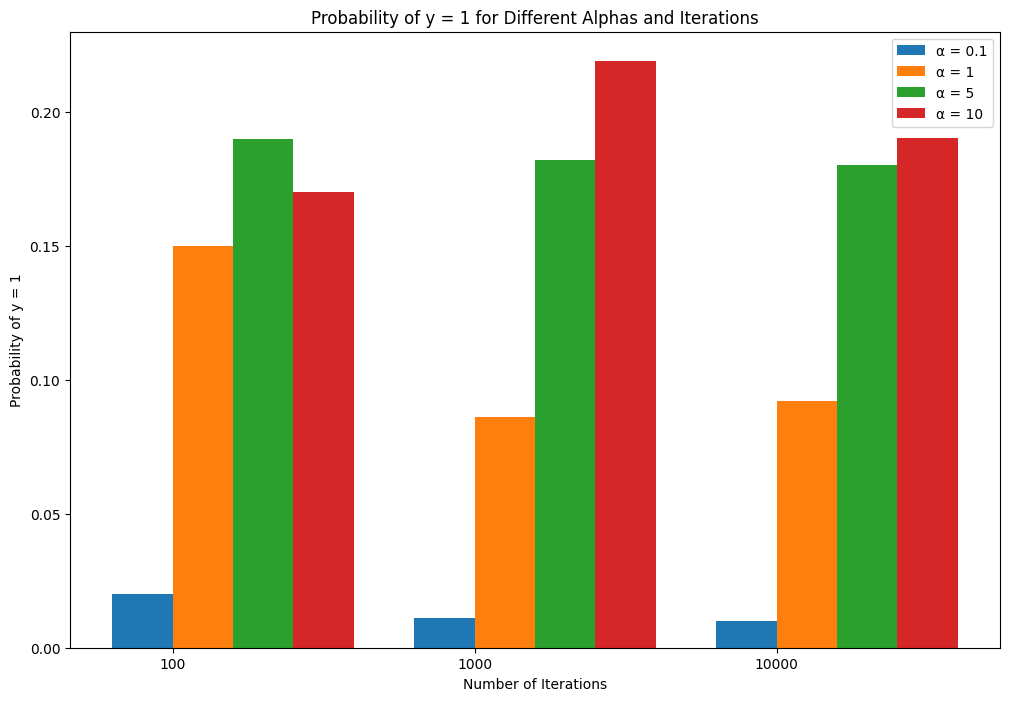

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def probabilistic_neuron(n, weights, threshold, alpha):
    """Simulate the neuron model for n iterations."""
    num_times_y_equals_1 = 0
    for _ in range(n):
        inputs = np.random.random(size=len(weights))
        weighted_sum = np.dot(weights, inputs)
        P = alpha * (weighted_sum - threshold)
        if np.random.random() <= P:
            num_times_y_equals_1 += 1
    return num_times_y_equals_1 / n

# Parameters
N = 4
weights = np.array([2, 0.5, -1, -2])
threshold = 0.5
iterations = [100, 1000, 10000]
alphas = [0.1, 1, 5, 10]

# Results dictionary
results = {alpha: {n: probabilistic_neuron(n, weights, threshold, alpha) for n in iterations} for alpha in alphas}

results

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 8))

# Setting the positions and width for the bars
pos = np.arange(len(iterations))
bar_width = 0.2

# Plotting each alpha's results
for idx, alpha in enumerate(alphas):
    probabilities = [results[alpha][n] for n in iterations]
    ax.bar(pos + idx * bar_width, probabilities, bar_width, label=f'α = {alpha}')

# Adding labels and title
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Probability of y = 1')
ax.set_title('Probability of y = 1 for Different Alphas and Iterations')
ax.set_xticks(pos + bar_width / 2)
ax.set_xticklabels(iterations)
ax.legend()

# Showing the plot
plt.show()


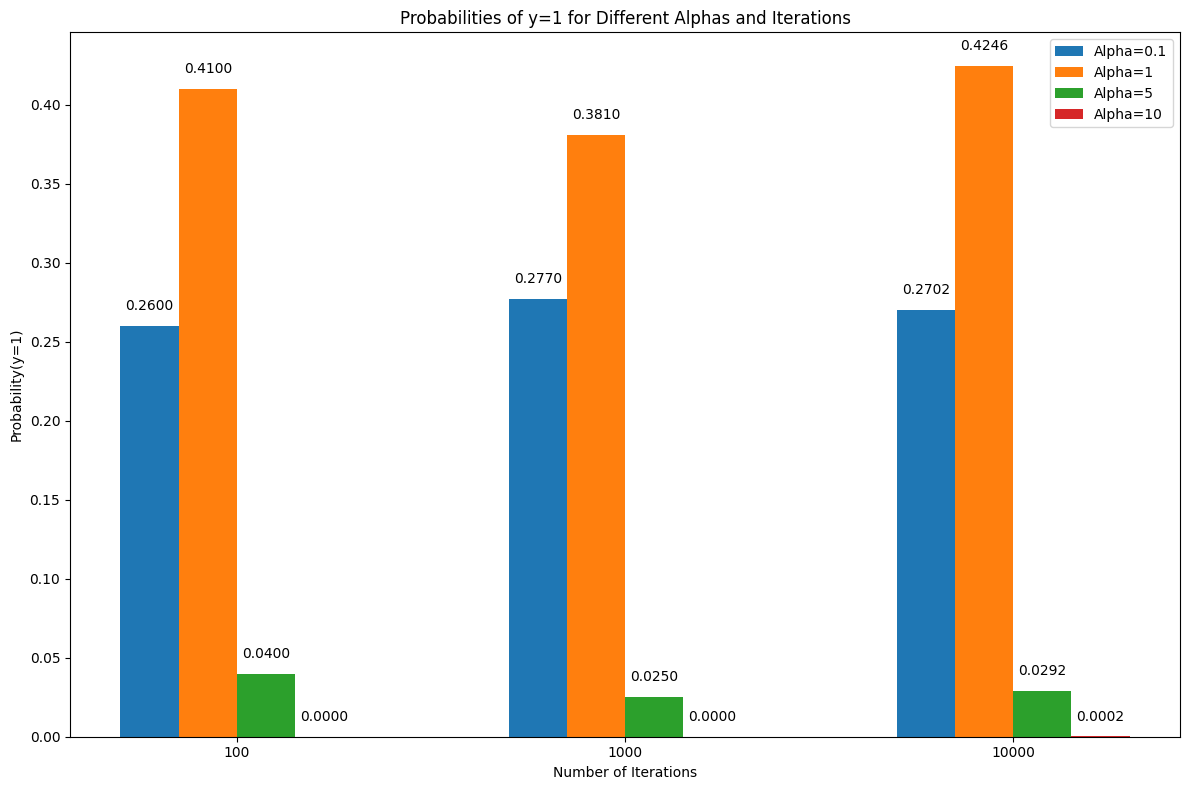

Alpha=0.1, Iterations=100, Probability(y=1)=0.2600
Alpha=0.1, Iterations=1000, Probability(y=1)=0.2770
Alpha=0.1, Iterations=10000, Probability(y=1)=0.2702
Alpha=1, Iterations=100, Probability(y=1)=0.4100
Alpha=1, Iterations=1000, Probability(y=1)=0.3810
Alpha=1, Iterations=10000, Probability(y=1)=0.4246
Alpha=5, Iterations=100, Probability(y=1)=0.0400
Alpha=5, Iterations=1000, Probability(y=1)=0.0250
Alpha=5, Iterations=10000, Probability(y=1)=0.0292
Alpha=10, Iterations=100, Probability(y=1)=0.0000
Alpha=10, Iterations=1000, Probability(y=1)=0.0000
Alpha=10, Iterations=10000, Probability(y=1)=0.0002


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_y(N, x, w, theta, alpha, num_iterations):
    P = np.zeros(N)
    y_counts = {1: 0}
    
    for _ in range(num_iterations):
        s = np.dot(x, w)
        probabilities = sigmoid(alpha * (s - theta))
        y = np.random.choice([0, 1], size=N, p=[1 - probabilities, probabilities])
        y_sum = np.sum(y)
        if y_sum not in y_counts:
            y_counts[y_sum] = 1
        else:
            y_counts[y_sum] += 1

    return y_counts

N = 4
x = np.array([0, 1, 1, 0])
w = np.array([2, 0.5, -1, -2])
theta = 0.5
alphas = [0.1, 1, 5, 10]
num_iterations = [100, 1000, 10000]

# Initialize lists to store probabilities for plotting
probabilities_for_alpha = []

for alpha in alphas:
    probabilities_for_iterations = []
    for iterations in num_iterations:
        y_counts = compute_y(N, x, w, theta, alpha, iterations)
        probability_y_1 = y_counts.get(1, 0) / iterations
        probabilities_for_iterations.append(probability_y_1)
    
    probabilities_for_alpha.append(probabilities_for_iterations)

# Create bar graph
plt.figure(figsize=(12, 8))
bar_width = 0.15
index = np.arange(len(num_iterations))

for i, alpha in enumerate(alphas):
    plt.bar(index + i * bar_width, probabilities_for_alpha[i], bar_width, label=f'Alpha={alpha}', align='center')

plt.xlabel('Number of Iterations')
plt.ylabel('Probability(y=1)')
plt.title('Probabilities of y=1 for Different Alphas and Iterations')
plt.xticks(index + bar_width * (len(alphas) - 1) / 2, num_iterations)
plt.legend()
plt.tight_layout()

# Add labels to the bars
for i in range(len(alphas)):
    for j in range(len(num_iterations)):
        plt.text(index[j] + i * bar_width, probabilities_for_alpha[i][j] + 0.01, f"{probabilities_for_alpha[i][j]:.4f}", ha='center')

plt.show()

# Display raw output
for i, alpha in enumerate(alphas):
    for j, iterations in enumerate(num_iterations):
        probability = probabilities_for_alpha[i][j]
        print(f"Alpha={alpha}, Iterations={iterations}, Probability(y=1)={probability:.4f}")

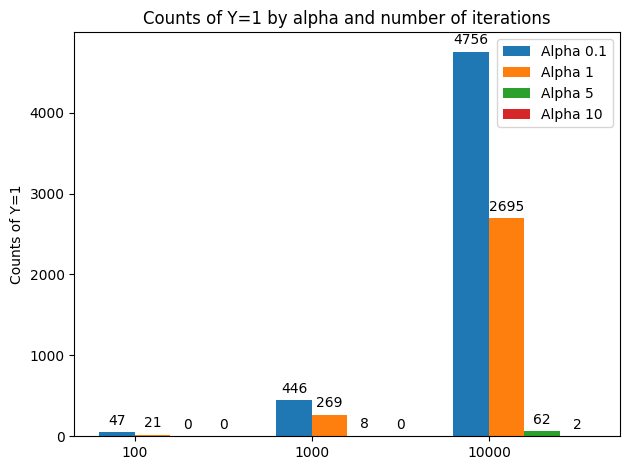

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x, alpha):
    return 1 / (1 + np.exp(-alpha * x))

def compute_y(times, alpha, weights, inputs, theta):
    weighted_sum = np.dot(weights, inputs)
    probability = sigmoid(weighted_sum - theta, alpha)
    count_y_equals_1 = 0

    for _ in range(times):
        if np.random.rand() <= probability:
            count_y_equals_1 += 1

    return count_y_equals_1, probability

# Parameters
inputs = np.array([0, 1, 1, 0])
weights = np.array([2, 0.5, -1, -2])
theta = 0.5
alphas = [0.1, 1, 5, 10]
iterations = [100, 1000, 10000]

# Compute and store results
results = {}
for alpha in alphas:
    results[alpha] = {}
    for iter in iterations:
        count_y_1, probability = compute_y(iter, alpha, weights, inputs, theta)
        results[alpha][iter] = {"count_y_1": count_y_1, "probability": probability}

results

# Extracting data for bar graph
alpha_labels = []
iteration_labels = list(iterations)
count_y_1_values = []

for alpha in alphas:
    alpha_labels.append(f'Alpha {alpha}')
    alpha_values = []
    for iter in iterations:
        alpha_values.append(results[alpha][iter]['count_y_1'])
    count_y_1_values.append(alpha_values)

# Creating the bar graph
x = np.arange(len(iteration_labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects = []
for i in range(len(alphas)):
    rects.append(ax.bar(x + i*width, count_y_1_values[i], width, label=alpha_labels[i]))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts of Y=1')
ax.set_title('Counts of Y=1 by alpha and number of iterations')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(iteration_labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for rect in rects:
    autolabel(rect)

fig.tight_layout()

plt.show()


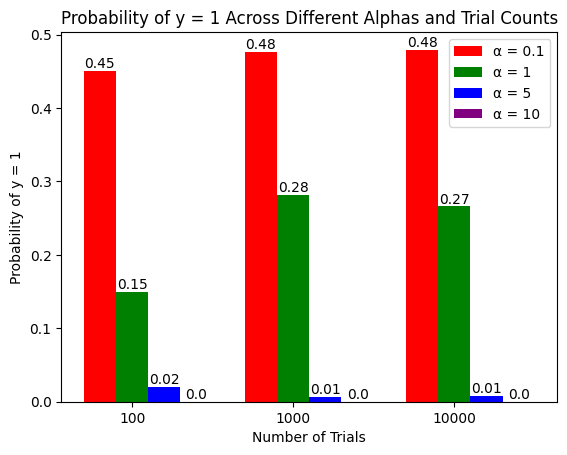

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def probabilistic_neuron(x, w, theta, alpha, trials):
    # Compute weighted sum
    s = np.dot(x, w)
    
    # Sigmoid function for probability
    P = 1 / (1 + np.exp(-alpha * (s - theta)))

    # Running the trials
    y_count = sum(np.random.rand(trials) < P)
    
    return y_count / trials  # Return the frequency of y = 1

# Inputs and weights
x = np.array([0, 1, 1, 0])
w = np.array([2, 0.5, -1, -2])
theta = 0.5

# Different alphas and number of trials
alphas = [0.1, 1, 5, 10]
trial_sets = [100, 1000, 10000]
results = {alpha: [] for alpha in alphas}

# Running experiments and storing results
for alpha in alphas:
    for trials in trial_sets:
        probability = probabilistic_neuron(x, w, theta, alpha, trials)
        results[alpha].append(probability)

# Plotting
fig, ax = plt.subplots()
colors = ['red', 'green', 'blue', 'purple']  # Different color for each alpha
width = 0.2  # width of the bars

for i, alpha in enumerate(alphas):
    bars = ax.bar([t + i * width for t in range(len(trial_sets))], results[alpha], width, label=f'α = {alpha}', color=colors[i])
    # Adding data labels
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

ax.set_xlabel('Number of Trials')
ax.set_ylabel('Probability of y = 1')
ax.set_title('Probability of y = 1 Across Different Alphas and Trial Counts')
ax.set_xticks([r + width for r in range(len(trial_sets))])
ax.set_xticklabels(trial_sets)
ax.legend()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def probabilistic_neuron_model(weights, threshold, alpha, num_trials):
    num_success = 0
    for _ in range(num_trials):
        x = np.random.rand(len(weights))
        s = np.dot(weights, x)
        p = sigmoid(alpha * (s - threshold))
        y = 1 if np.random.rand() <= p else 0
        if y == 1:
            num_success += 1
    return num_success / num_trials

# Parameters
weights = np.array([2, 0.5, -1, -2])
threshold = 0.5
alphas = [0.1, 1, 5, 10]
num_trials_list = [100, 1000, 10000]

# Running the simulations
results = {}
for alpha in alphas:
    results[alpha] = {}
    for num_trials in num_trials_list:
        probability = probabilistic_neuron_model(weights, threshold, alpha, num_trials)
        results[alpha][num_trials] = probability

results

plt.figure(figsize=(12, 6))

for idx, (alpha, trials_results) in enumerate(results.items()):
    probabilities = [trials_results[trial] for trial in num_trials_list]
    pos = alpha_pos + idx * bar_width
    bars = plt.bar(pos, probabilities, width=bar_width, label=f'Alpha={alpha}')

    # Adding text on bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), 
                 ha='center', va='bottom')

# Adding labels and titles
plt.xlabel('Number of Trials')
plt.ylabel('Probability of y=1')
plt.title('Probability of y=1 for Different Alphas and Number of Trials')
plt.xticks(alpha_pos + bar_width, num_trials_list)
plt.legend()
plt.tight_layout()
plt.show()

# Assuming the number of neurons (N) and num_iterations
N = 4  # Number of neurons
num_iterations = [100, 1000, 10000]

# Using the same weights and threshold for each neuron as defined earlier
weights = np.array([2, 0.5, -1, -2])
threshold = 0.5
alphas = [0.1, 1, 5, 10]

# Initialize dictionary to store probabilities for plotting
probabilities_for_alpha = {alpha: {iterations: [] for iterations in num_iterations} for alpha in alphas}

# Compute probabilities for each neuron, alpha, and iteration
for alpha in alphas:
    for iterations in num_iterations:
        for neuron in range(N):
            probability = probabilistic_neuron_model(weights, threshold, alpha, iterations)
            probabilities_for_alpha[alpha][iterations].append(probability)

# Calculating average probabilities across all neurons for each alpha and number of trials
average_probabilities = {alpha: {iterations: np.mean(probabilities_for_alpha[alpha][iterations]) 
                                 for iterations in num_iterations} for alpha in alphas}

# Creating a bar graph for the averaged results
plt.figure(figsize=(12, 6))

for idx, (alpha, trials_results) in enumerate(average_probabilities.items()):
    avg_probabilities = [trials_results[trial] for trial in num_iterations]
    pos = alpha_pos + idx * bar_width
    bars = plt.bar(pos, avg_probabilities, width=bar_width, label=f'Alpha={alpha}')

    # Adding text on bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), 
                 ha='center', va='bottom')

# Adding labels and titles
plt.xlabel('Number of Trials')
plt.ylabel('Average Probability of y=1')
plt.title('Average Probability of y=1 for Different Alphas and Number of Trials')
plt.xticks(alpha_pos + bar_width, num_iterations)
plt.legend()
plt.tight_layout()
plt.show()



# Creating a combined plot for all neurons
plt.figure(figsize=(20, 8))

# Width of each bar
bar_width = 0.1

# Generating bar positions for each group
bar_positions = [np.arange(N) - (bar_width * (len(num_iterations) - 1) / 2) + i * bar_width 
                 for i in range(len(num_iterations))]

for alpha_idx, alpha in enumerate(alphas):
    for iter_idx, iterations in enumerate(num_iterations):
        # Calculating the offset index for positioning the bars
        offset_idx = iter_idx
        bars = plt.bar(bar_positions[offset_idx], probabilities_for_alpha[alpha][iterations], 
                       width=bar_width, label=f'Alpha={alpha}, Iterations={iterations}')

        # Adding text on bars
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), 
                     ha='center', va='bottom', fontsize=8)

plt.xlabel('Neuron')
plt.ylabel('Probability(y=1)')
plt.title('Comparison of Neuron Firing Probabilities Across All Alphas and Iterations')
plt.xticks(np.arange(N), [f'Neuron {i + 1}' for i in range(N)])
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))

# We will plot each neuron's results for each alpha and number of trials
for idx, alpha in enumerate(alphas):
    for iter_idx, iterations in enumerate(num_iterations):
        neuron_probabilities = probabilities_for_alpha[alpha][iterations]
        pos = np.arange(len(neuron_probabilities)) + idx * bar_width + iter_idx * len(alphas) * bar_width
        bars = plt.bar(pos, neuron_probabilities, width=bar_width, label=f'Alpha={alpha}, Iterations={iterations}')

        # Adding text on bars
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), 
                     ha='center', va='bottom', fontsize=8)

# Adding labels and titles
plt.xlabel('Neuron')
plt.ylabel('Probability of y=1')
plt.title('Probability of y=1 for Each Neuron Across Different Alphas and Number of Trials')
plt.xticks(np.arange(N) + bar_width * len(alphas) / 2, [f'Neuron {i + 1}' for i in range(N)])
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

-----------

## Task2

## Task2-1